In [91]:
# Chargement des bibliothèques 

import os
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import learning_curve
import seaborn as sns

from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans

from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix




# Nous allons  utilisé 6 modèles

In [2]:
# Verification de l'emplacement 
os.chdir('DASHBOARD')

In [32]:
# Chargement des tables


data_smote = pd.read_feather("data/train_data_smote_feather")
label_smote = pd.read_feather("data/y_data_feather")
train_data_original = pd.read_feather('data/X_mini_feather')

In [33]:
# Pourcentage des valeurs dans la colonne Target
label_smote.value_counts()/len(label_smote)

TARGET
0.0       0.588235
1.0       0.411765
dtype: float64

### Partageons en train et test sets

In [34]:
X = data_smote
y = label_smote

In [35]:
print(X.shape, y.shape)

(46920, 41) (46920, 1)


In [36]:
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.33, random_state=42)

# LogisticRegression() 

In [37]:
# Model de BaseLine
lr = LogisticRegression() 
lr.fit(x_train, y_train)

LogisticRegression()

In [38]:
pred_cv = lr.predict(x_cv)

print('Recall pour le modele LogisticRegression %.2f' %(recall_score(y_cv,pred_cv)))
print('Presision pour le modele LogisticRegression %.2f' %(precision_score(y_cv,pred_cv)))
print('AUC pour le modele LogisticRegression %.2f' %(roc_auc_score(y_cv,pred_cv)))

Recall pour le modele LogisticRegression 0.73
Presision pour le modele LogisticRegression 0.77
AUC pour le modele LogisticRegression 0.79


n1 of kfold 5
recall_score 0.7223084886128365
n2 of kfold 5
recall_score 0.7280020703933747
n3 of kfold 5
recall_score 0.7230848861283644
n4 of kfold 5
recall_score 0.7228260869565217
n5 of kfold 5
recall_score 0.7212732919254659
Moyenne = 0.723


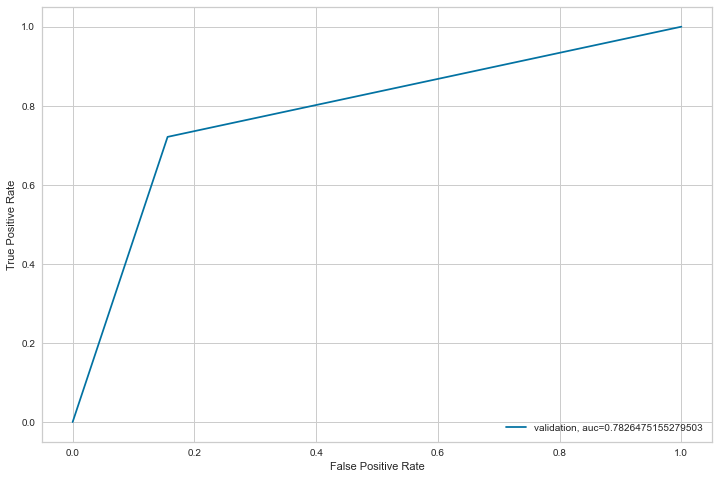

<AxesSubplot:>

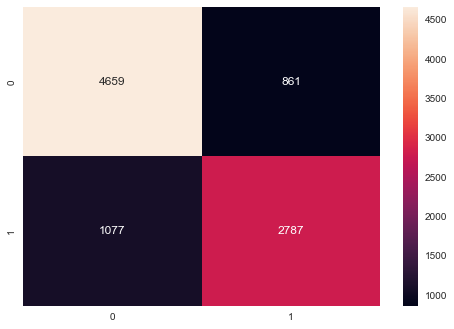

In [44]:
# Amélioration et entrainements du modèle 5 fois en gardant toujours les mêmes proportion dans la colonne Target
i=1
score_cum = []
kf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True) 
for train_index,test_index in kf.split(X,y):
     print('n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.iloc[train_index],X.iloc[test_index]
     ytr,yvl = y.iloc[train_index],y.iloc[test_index]
     model = LogisticRegression(random_state=42)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = recall_score(yvl,pred_test)
     print('recall_score',score)
     score_cum.append(score)
     i+=1
print('=='*15)    
print('Moyenne = %.3f' % (np.sum(score_cum)/(i-1)))


pred=model.predict_proba(xvl)[:,1]



fpr, tpr, _ = roc_curve(yvl,pred_test)
auc = roc_auc_score(yvl,pred_test) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

sns.heatmap(confusion_matrix(yvl,pred_test),annot=True, fmt='d')

* Il n'y a pas de différence après la cross-validation

# Gaussian Naive Bayes:

In [22]:
nb = GaussianNB()
nb.fit(x_train,y_train)
pred_cv = nb.predict(x_cv)

print('Recall pour le modele GaussianNB %.2f' %(recall_score(y_cv,pred_cv)))
print('Presision pour le modele GaussianNB %.2f' %(precision_score(y_cv,pred_cv)))
print('AUC pour le modele GaussianNB %.2f' %(roc_auc_score(y_cv,pred_cv)))

Recall pour le modele GaussianNB 1.00
Presision pour le modele GaussianNB 0.41
AUC pour le modele GaussianNB 0.50


n1 of kfold 5
recall_score 0.9971532091097308
n2 of kfold 5
recall_score 0.9968944099378882
n3 of kfold 5
recall_score 0.49249482401656314
n4 of kfold 5
recall_score 0.9966356107660456
n5 of kfold 5
recall_score 0.9966356107660456
Moyenne = 0.896


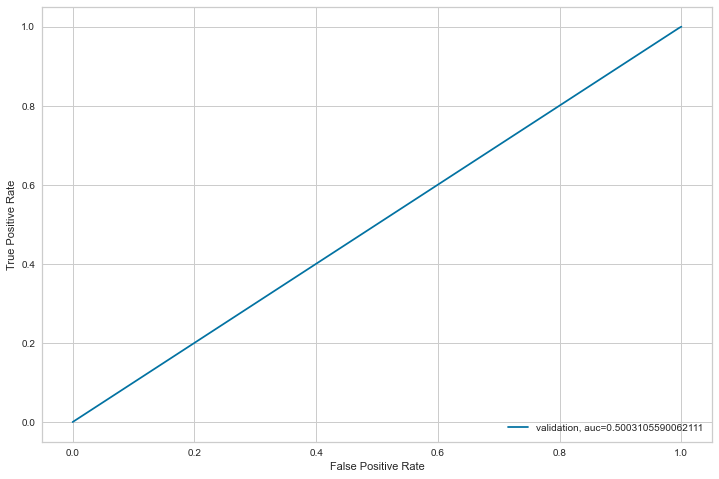

<AxesSubplot:>

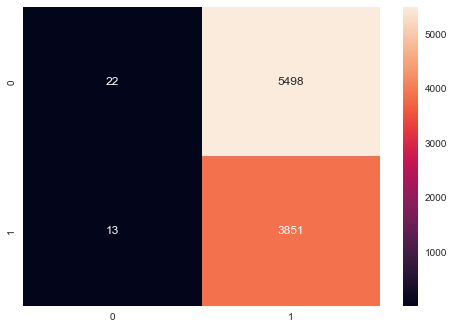

In [45]:
# Amélioration et entrainements du modèle 5 fois en gardant toujours les mêmes proportion dans la colonne Target
i=1
score_cum = []
kf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True) 
for train_index,test_index in kf.split(X,y):
     print('n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.iloc[train_index],X.iloc[test_index]
     ytr,yvl = y.iloc[train_index],y.iloc[test_index]
     model = GaussianNB()
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = recall_score(yvl,pred_test)
     print('recall_score',score)
     score_cum.append(score)
     i+=1
print('=='*15)    
print('Moyenne = %.3f' % (np.sum(score_cum)/(i-1)))


pred=model.predict_proba(xvl)[:,1]



fpr, tpr, _ = roc_curve(yvl,pred_test)
auc = roc_auc_score(yvl,pred_test) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

sns.heatmap(confusion_matrix(yvl,pred_test),annot=True, fmt='d')

* aucune prédiction 50/50

# K-Nearest Neighbours:

In [46]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
pred_cv=knn.predict(x_cv)
print('Recall pour le modele KNeighborsClassifier %.2f' %(recall_score(y_cv,pred_cv)))
print('Presision pour le modele KNeighborsClassifier %.2f' %(precision_score(y_cv,pred_cv)))
print('AUC pour le modele KNeighborsClassifier %.2f' %(roc_auc_score(y_cv,pred_cv)))

Recall pour le modele KNeighborsClassifier 0.87
Presision pour le modele KNeighborsClassifier 0.71
AUC pour le modele KNeighborsClassifier 0.81


n1 of kfold 5
recall_score 0.8799171842650103
n2 of kfold 5
recall_score 0.8737060041407867
n3 of kfold 5
recall_score 0.8840579710144928
n4 of kfold 5
recall_score 0.8778467908902692
n5 of kfold 5
recall_score 0.8726708074534162
Moyenne = 0.878


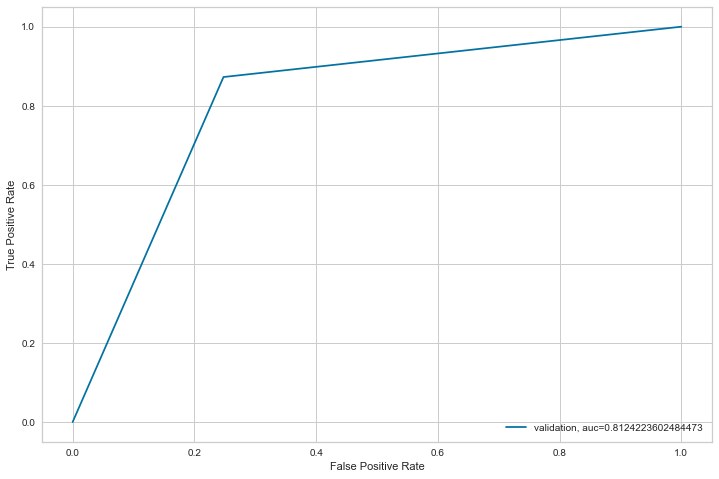

<AxesSubplot:>

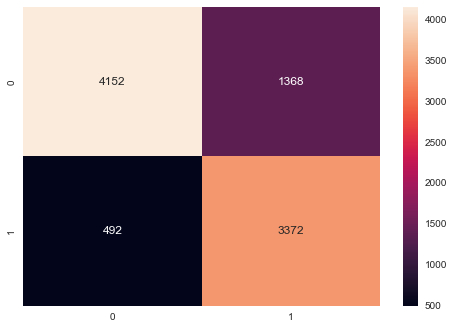

In [47]:
# Amélioration et entrainements du modèle 5 fois en gardant toujours les mêmes proportion dans la colonne Target
i=1
score_cum = []
kf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True) 
for train_index,test_index in kf.split(X,y):
     print('n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.iloc[train_index],X.iloc[test_index]
     ytr,yvl = y.iloc[train_index],y.iloc[test_index]
     model = KNeighborsClassifier(n_neighbors=7)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = recall_score(yvl,pred_test)
     print('recall_score',score)
     score_cum.append(score)
     i+=1
print('=='*15)    
print('Moyenne = %.3f' % (np.sum(score_cum)/(i-1)))


pred=model.predict_proba(xvl)[:,1]



fpr, tpr, _ = roc_curve(yvl,pred_test)
auc = roc_auc_score(yvl,pred_test) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

sns.heatmap(confusion_matrix(yvl,pred_test),annot=True, fmt='d')

* Pas mal, Mieux que Logistique Regression

# Decision Tree:

In [48]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
pred_cv = dt.predict(x_cv)
print('Recall pour le modele DecisionTreeClassifier %.2f' %(recall_score(y_cv,pred_cv)))
print('Presision pour le modele DecisionTreeClassifier %.2f' %(precision_score(y_cv,pred_cv)))
print('AUC pour le modele DecisionTreeClassifier %.2f' %(roc_auc_score(y_cv,pred_cv)))


Recall pour le modele DecisionTreeClassifier 0.82
Presision pour le modele DecisionTreeClassifier 0.80
AUC pour le modele DecisionTreeClassifier 0.84


n1 of kfold 5
recall_score 0.8426501035196687
n2 of kfold 5
recall_score 0.8366977225672878
n3 of kfold 5
recall_score 0.827639751552795
n4 of kfold 5
recall_score 0.828416149068323
n5 of kfold 5
recall_score 0.8335921325051759
Moyenne = 0.834


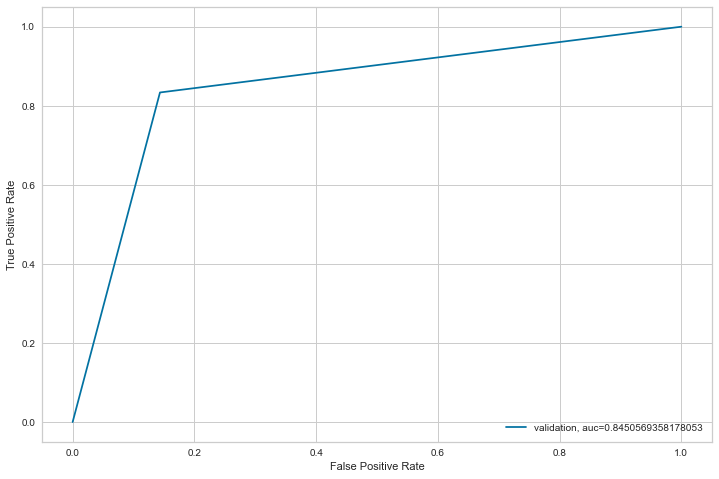

<AxesSubplot:>

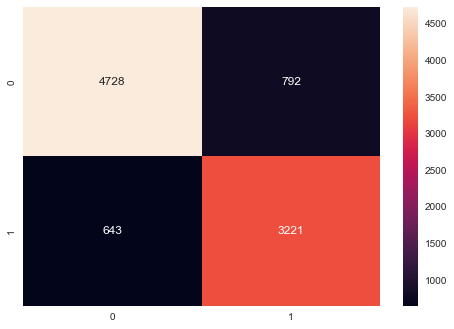

In [49]:
# Amélioration et entrainements du modèle 5 fois en gardant toujours les mêmes proportion dans la colonne Target
i=1
score_cum = []
kf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True) 
for train_index,test_index in kf.split(X,y):
     print('n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.iloc[train_index],X.iloc[test_index]
     ytr,yvl = y.iloc[train_index],y.iloc[test_index]
     model = DecisionTreeClassifier(random_state=42)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = recall_score(yvl,pred_test)
     print('recall_score',score)
     score_cum.append(score)
     i+=1
print('=='*15)    
print('Moyenne = %.3f' % (np.sum(score_cum)/(i-1)))


pred=model.predict_proba(xvl)[:,1]



fpr, tpr, _ = roc_curve(yvl,pred_test)
auc = roc_auc_score(yvl,pred_test) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

sns.heatmap(confusion_matrix(yvl,pred_test),annot=True, fmt='d')

* à chaque fois ça va de mieux en mieux

# RandomForestClassifier

In [50]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)
pred_cv = rfc.predict(x_cv)
print('Recall pour le modele de base %.2f' %(recall_score(y_cv,pred_cv)))
print('Presision pour le modele de base %.2f' %(precision_score(y_cv,pred_cv)))
print('AUC pour le modele de base %.2f' %(roc_auc_score(y_cv,pred_cv)))

Recall pour le modele de base 0.87
Presision pour le modele de base 0.94
AUC pour le modele de base 0.92


n1 of kfold 5
recall_score 0.8672360248447205
n2 of kfold 5
recall_score 0.8685300207039337
n3 of kfold 5
recall_score 0.8628364389233955
n4 of kfold 5
recall_score 0.8630952380952381
n5 of kfold 5
recall_score 0.8620600414078675
Moyenne = 0.865


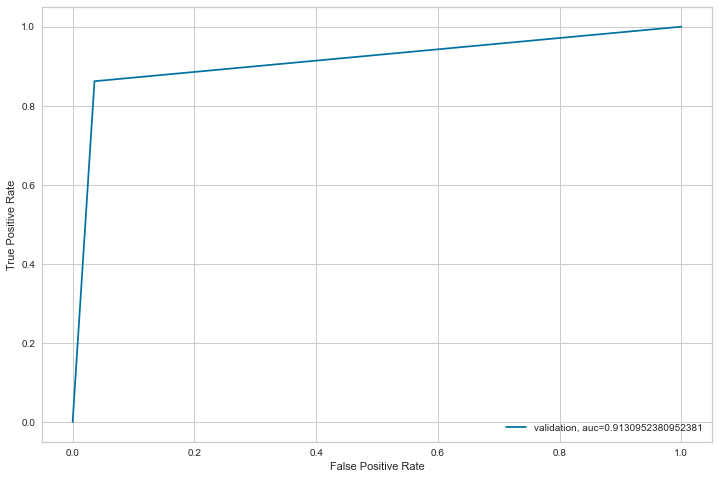

<AxesSubplot:>

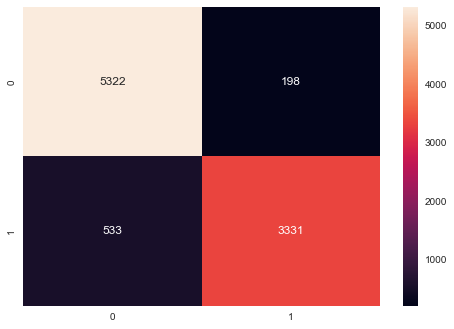

In [51]:
# Amélioration et entrainements du modèle 5 fois en gardant toujours les mêmes proportion dans la colonne Target
i=1
score_cum = []
kf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True) 
for train_index,test_index in kf.split(X,y):
     print('n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.iloc[train_index],X.iloc[test_index]
     ytr,yvl = y.iloc[train_index],y.iloc[test_index]
     model = RandomForestClassifier(random_state=42)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = recall_score(yvl,pred_test)
     print('recall_score',score)
     score_cum.append(score)
     i+=1
print('=='*15)    
print('Moyenne = %.3f' % (np.sum(score_cum)/(i-1)))


pred=model.predict_proba(xvl)[:,1]



fpr, tpr, _ = roc_curve(yvl,pred_test)
auc = roc_auc_score(yvl,pred_test) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

sns.heatmap(confusion_matrix(yvl,pred_test),annot=True, fmt='d')

* en ce moment RandomForestClassifier est le meilleur modèle 

# XG-Boost:

In [52]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)
pred_cv = xgb_model.predict(x_cv)
print('Recall pour le modele de base %.2f' %(recall_score(y_cv,pred_cv)))
print('Presision pour le modele de base %.2f' %(precision_score(y_cv,pred_cv)))
print('AUC pour le modele de base %.2f' %(roc_auc_score(y_cv,pred_cv)))

[10:34:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Recall pour le modele de base 0.88
Presision pour le modele de base 0.97
AUC pour le modele de base 0.93


n1 of kfold 5
[10:36:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
recall_score 0.8822463768115942
n2 of kfold 5
[10:36:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
recall_score 0.8765527950310559
n3 of kfold 5
[10:36:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
recall_score 0.8674948240165632
n4 of kfold 5
[10:36:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluatio

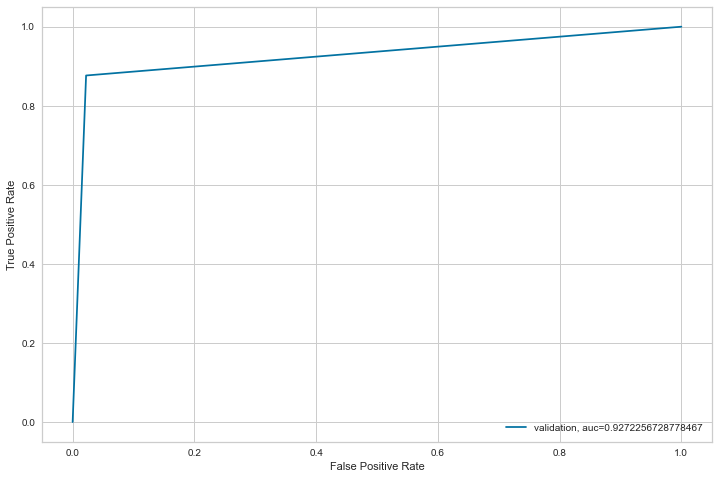

<AxesSubplot:>

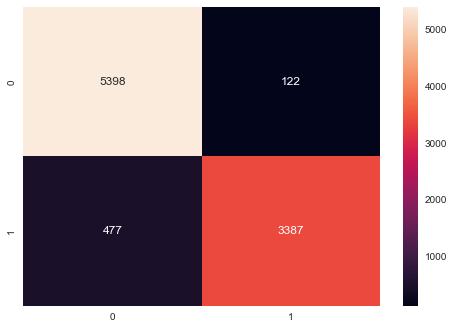

In [53]:
# Amélioration et entrainements du modèle 5 fois en gardant toujours les mêmes proportion dans la colonne Target
i=1
score_cum = []
kf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True) 
for train_index,test_index in kf.split(X,y):
     print('n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.iloc[train_index],X.iloc[test_index]
     ytr,yvl = y.iloc[train_index],y.iloc[test_index]
     model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = recall_score(yvl,pred_test)
     print('recall_score',score)
     score_cum.append(score)
     i+=1
print('=='*15)    
print('Moyenne = %.3f' % (np.sum(score_cum)/(i-1)))


pred=model.predict_proba(xvl)[:,1]



fpr, tpr, _ = roc_curve(yvl,pred_test)
auc = roc_auc_score(yvl,pred_test) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

sns.heatmap(confusion_matrix(yvl,pred_test),annot=True, fmt='d')

* Dans tous les cas le score de ROC-AUC du modelé xgboost est plus élevé 

# Hyperparametres

### Score personalisé (perte plus importante si un pres n'est pas remboursé si on prend pas le client)

In [54]:
#(5*FP +FN)/total   - on penalise les faux positives

def custom_metric(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    score = 1-(((5*cm[1,0] + cm[0,1]))/cm.sum())
    return score

In [55]:
custom_score = metrics.make_scorer(custom_metric,greater_is_better = True)
custom_score

make_scorer(custom_metric)

In [56]:
custom_metric(y_cv,pred_cv)

0.747416688194265

In [57]:
paramgrid = {'max_depth': list(range(1, 8, 2)), 
                    'n_estimators': list(range(100, 220, 20))}

In [58]:
grid_search=RandomizedSearchCV(RandomForestClassifier(random_state=42),paramgrid,scoring=custom_score, cv=3, n_iter=10)

In [59]:
# Fit the grid search model 
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [1, 3, 5, 7],
                                        'n_estimators': [100, 120, 140, 160,
                                                         180, 200]},
                   scoring=make_scorer(custom_metric))

In [66]:
model = grid_search.best_estimator_

In [67]:
# Vérification overfitting et des plusieurs scores
def evaluation(model, name=None, visual = True):
    model.fit(x_train,y_train)
    ypred = model.predict(x_cv)
    y_pred_proba = model.predict_proba(x_cv)

    print( classification_report(y_cv,ypred))
    print(f'{name}')

    N, train_score,val_score = learning_curve(model,x_train,y_train,cv=5,scoring='recall',train_sizes=np.linspace(0.1,1.0,10))
    
    if visual == True:
        plt.figure(figsize=(12,4))
        plt.subplot(1,2,2)
        plt.plot(N,train_score.mean(axis=1), label = f'{name} train score')
        plt.plot(N,val_score.mean(axis=1), label = f'{name} val score')
        plt.legend()
        plt.subplot(1,2,1)
        sns.heatmap(confusion_matrix(y_cv,ypred ),annot=True, fmt='d')
    else:
        print(f"Pour le model {name} le recall_score egal a {recall_score(y_cv, y_pred_proba[:,1])}")
        
        
    

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      9127
         1.0       0.88      0.74      0.80      6357

    accuracy                           0.85     15484
   macro avg       0.86      0.83      0.84     15484
weighted avg       0.85      0.85      0.85     15484

RandomForestClassifier


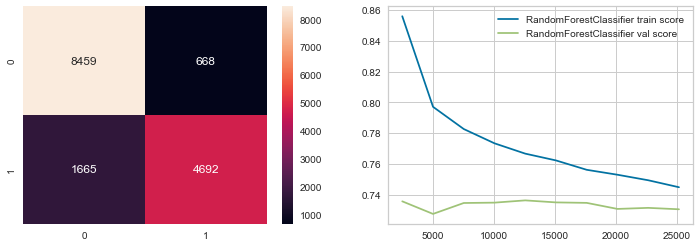

In [68]:
evaluation(model,name='RandomForestClassifier')

# Precision Recall Curve

In [70]:
tabl_np_precision, tabl_np_recall, tabl_np_threshold = precision_recall_curve(y_cv, model.predict_proba(x_cv)[:,1])

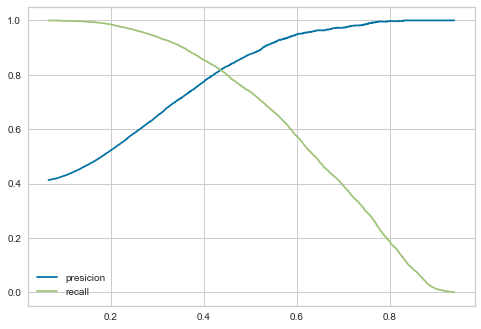

In [71]:
plt.plot(tabl_np_threshold,tabl_np_precision[:-1], label = 'presicion')
plt.plot(tabl_np_threshold,tabl_np_recall[:-1], label = 'recall')
plt.legend()
# plt.savefig('precision recall curve.png')

* En réalité il faut prendre 0.33 (peut allez jusqu'a 0.38) Dans notre cas on peut prendre un treshold = 0.4 - pour plus privilèger au score du Recall

### Fonction de prédiction 

In [72]:
model_final = model
def predict_col(index):
    a = model_final.predict_proba(data_smote[data_smote.index == int(index)])[:,1]
    if a<0.4:
        print('accepter')
    else:
        print('refuser')
    print(a)

# Lime

In [73]:
# Explication de la décision 
data_smote.head()

,DAYS_BIRTH,CLOSED_AMT_CREDIT_SUM_OVERDUE_MEAN,CLOSED_AMT_CREDIT_SUM_OVERDUE_STD,HOUR_APPR_PROCESS_START,CC_SK_DPD_SUM,AMT_INCOME_TOTAL,ACTIVE_CREDIT_DAY_OVERDUE_MIN,CLOSED_CREDIT_DAY_OVERDUE_STD,AMT_GOODS_PRICE,CLOSED_CREDIT_DAY_OVERDUE_MEAN,...,REGION_RATING_CLIENT,EXT_SOURCE_2,FLAG_OWN_CAR,PREV_PRODUCT_COMBINATION_CASH_TYPE_OTHER_MEAN,PREV_NAME_PORTFOLIO_Cash_MEAN,APARTMENTS_AVG,REGION_POPULATION_RELATIVE,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER
0,0.060759,-0.004625,-0.004626,-0.282335,-0.045972,-0.018043,-0.017367,-0.028083,0.478798,-0.028022,...,2,0.544922,1,0.571289,0.428467,0.103088,0.018631,1,0,0
1,-1.145419,-0.004625,-0.004626,0.371959,-0.045972,0.074039,-0.017367,-0.028083,-0.784423,-0.028022,...,2,0.587402,0,0.888672,0.111084,0.259766,0.015221,0,0,1
2,-1.352471,-0.004625,-0.004626,0.699107,-0.045972,0.273767,-0.017367,-0.028083,-0.075472,-0.028022,...,1,0.643555,0,1.000000,0.000000,0.087585,0.046234,0,0,0
3,-0.408928,-0.004625,-0.004626,0.699107,-0.045972,0.727693,-0.017367,-0.028083,0.440128,-0.028022,...,1,0.788574,0,0.888672,0.111084,0.087585,0.032562,1,1,1
4,2.164622,-0.004625,-0.004626,0.044812,-0.045972,0.144074,-0.017367,-0.028083,-0.848873,-0.028022,...,1,0.663574,0,0.666504,0.333252,0.092773,0.046234,0,0,1


In [74]:
len(label_smote)

46920

In [75]:
idx=55 # de 1 à 30000
print("Label reel -->",label_smote.loc[idx])
print('=='*20)
predict_col(idx)

Label reel --> TARGET    0.0
Name: 55, dtype: float16
refuser
[0.44680431]


In [76]:
from lime.lime_tabular import LimeTabularExplainer 
explainer = LimeTabularExplainer(data_smote,training_labels=label_smote,
                      feature_names=data_smote.columns, 
                      categorical_names=[1,11,26,35],        
                      class_names=['accepter','refuser'], 
                      discretize_continuous=False, 
                      verbose=True)

In [77]:
lime = explainer.explain_instance(data_smote.loc[idx].values, model_final.predict_proba)
lime.show_in_notebook(show_table=True)

Intercept 0.5742774608943343
Prediction_local [0.55798872]
Right: 0.44680431336921816


# SHAP

In [78]:
import shap
%matplotlib inline

explainer_shap = shap.TreeExplainer(model_final)
expected_value = explainer_shap.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value
print(f"Explainer Expected Value: {expected_value}")

Explainer Expected Value: [0.58753694 0.41246306]


In [79]:
num = 50 # test 50 clients
select = range(num)


In [80]:
features = data_smote.iloc[select]

In [81]:
feature_display = data_smote.loc[features.index]

In [82]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    shap_values = explainer_shap.shap_values(features)[1]
    shap_interaction_values = explainer_shap.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

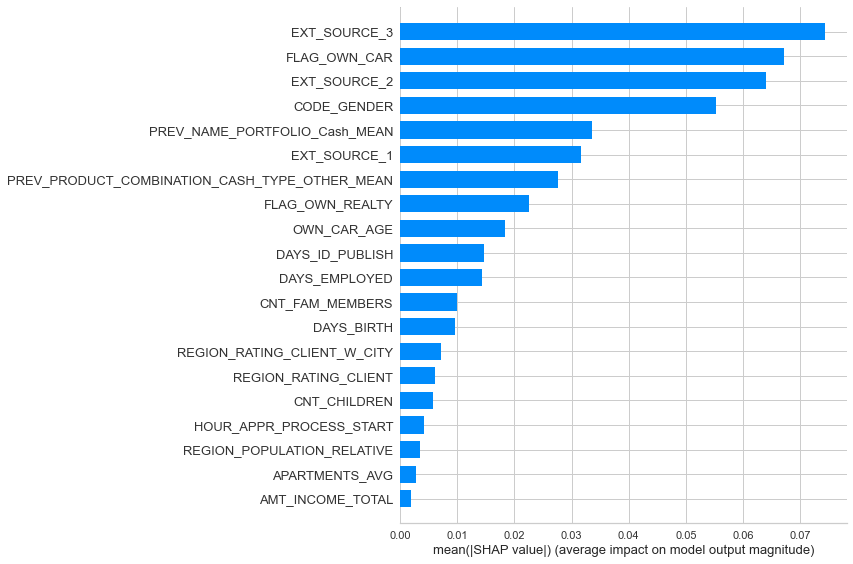

In [83]:
# Laquelle de ces variables varie plus que les autres 
shap.summary_plot(shap_values, feature_display, plot_type='bar')

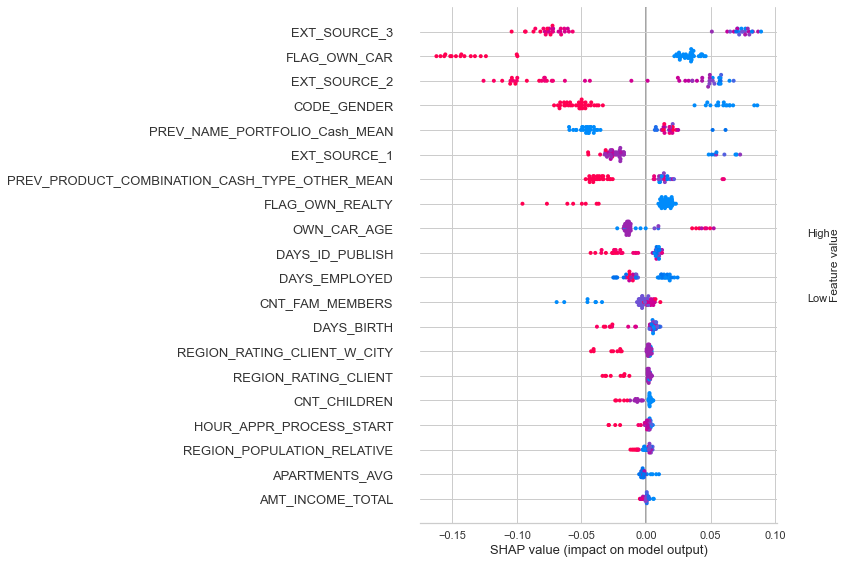

In [84]:
# Idem + la dispersion
shap.summary_plot(shap_values, features)

In [85]:
# Correlation entre 2 variables 
ind = 'AMT_INCOME_TOTAL'
interaction_index = 'AMT_GOODS_PRICE'

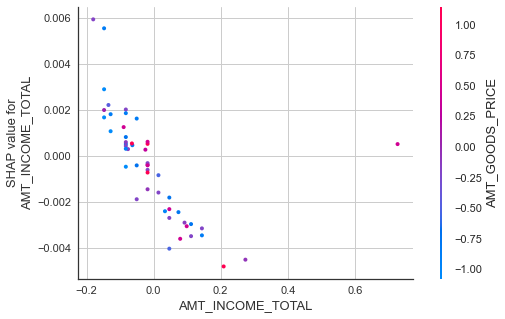

In [86]:
shap.dependence_plot(ind=ind, interaction_index=interaction_index,
                    shap_values=shap_values, features=data_smote[:num],
                    display_features=feature_display)

In [87]:
# Positif et négatif remarque 
shap.initjs() # run to show the plot
shap.force_plot(explainer_shap.expected_value[0], shap_values[0])

In [88]:
# Lié avec représentation ci-dessus
list(zip(range(data_smote.shape[1]),data_smote.columns))

[(0, 'DAYS_BIRTH'),
 (1, 'CLOSED_AMT_CREDIT_SUM_OVERDUE_MEAN'),
 (2, 'CLOSED_AMT_CREDIT_SUM_OVERDUE_STD'),
 (3, 'HOUR_APPR_PROCESS_START'),
 (4, 'CC_SK_DPD_SUM'),
 (5, 'AMT_INCOME_TOTAL'),
 (6, 'ACTIVE_CREDIT_DAY_OVERDUE_MIN'),
 (7, 'CLOSED_CREDIT_DAY_OVERDUE_STD'),
 (8, 'AMT_GOODS_PRICE'),
 (9, 'CLOSED_CREDIT_DAY_OVERDUE_MEAN'),
 (10, 'CLOSED_AMT_CREDIT_SUM_OVERDUE_MAX'),
 (11, 'INSTALLMENTS_ANNUITY_INS_AMT_INSTALMENT_MEAN_RATIO'),
 (12, 'BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX'),
 (13, 'OWN_CAR_AGE'),
 (14, 'DAYS_EMPLOYED'),
 (15, 'BUREAU_AMT_CREDIT_SUM_OVERDUE_STD'),
 (16, 'AMT_ANNUITY'),
 (17, 'AMT_CREDIT'),
 (18, 'BUREAU_CREDIT_DAY_OVERDUE_STD'),
 (19, 'CLOSED_AMT_CREDIT_SUM_OVERDUE_SUM'),
 (20, 'CC_SK_DPD_STD'),
 (21, 'ACTIVE_AMT_CREDIT_SUM_OVERDUE_STD'),
 (22, 'INSTALLMENTS_ANNUITY_INS_AMT_INSTALMENT_SUM_RATIO'),
 (23, 'DAYS_REGISTRATION'),
 (24, 'BUREAU_AMT_CREDIT_SUM_OVERDUE_MIN'),
 (25, 'EXT_SOURCE_1'),
 (26, 'EXT_SOURCE_3'),
 (27, 'CNT_FAM_MEMBERS'),
 (28, 'DAYS_ID_PUBLISH'),
 (29

In [89]:
os.getcwd()

'C:\\Users\\vasub\\Downloads\\dossier_gev\\projet_7\\Soutenance_PR_7 Barseghyan_Gevorg\\DASHBOARD'

In [90]:
# SauvSauvegarde du modèle RandomForestClassifier

pickle_out = open('data/model_final.pkl', 'wb')
pickle.dump(model_final,pickle_out)
pickle_out.close()

NameError: name 'pickle' is not defined

# KMeans

In [92]:
df_final=pd.read_feather('data/df_final_scaled')

In [93]:
nearest_neighbors = df_final[['AMT_INCOME_TOTAL', 'AMT_ANNUITY','CODE_GENDER', 'AMT_CREDIT','EXT_SOURCE_1','DAYS_BIRTH','TARGET']]

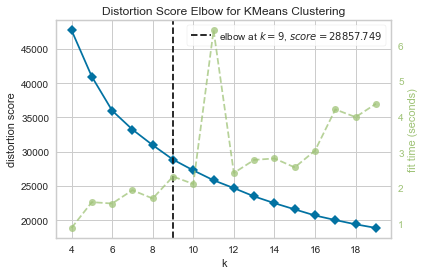

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
# On cherche le nombre des clusters
model_yellow = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_yellow, k=(4,20))

visualizer.fit(nearest_neighbors)    
visualizer.poof()   

In [95]:
clustering = KMeans(n_clusters=9,random_state=42)

In [96]:
clustering.fit(nearest_neighbors)

KMeans(n_clusters=9, random_state=42)

In [97]:
# Label de chaque client
labels_cluster = clustering.labels_
labels_cluster

array([6, 3, 0, ..., 6, 1, 1])

In [98]:
len(clustering.labels_)

30000

In [99]:
# Les features les plus informatives
data_neighboard =train_data_original[['AMT_INCOME_TOTAL', 'AMT_ANNUITY','CODE_GENDER', 'AMT_CREDIT','EXT_SOURCE_1','DAYS_BIRTH','TARGET']]

In [100]:
# Creation de nouvelle feature
data_neighboard['class']=clustering.labels_


In [101]:
data_neighboard.head()

,AMT_INCOME_TOTAL,AMT_ANNUITY,CODE_GENDER,AMT_CREDIT,EXT_SOURCE_1,DAYS_BIRTH,TARGET,class
0,157500.0,26487.0,0,797557.5,0.728027,43.468750,0.0,6
1,221400.0,9814.5,1,247500.0,0.542969,29.906250,0.0,3
2,360000.0,54855.0,0,521136.0,0.505859,27.578125,0.0,0
3,675000.0,33750.0,1,675000.0,0.505859,38.187500,0.0,6
4,270000.0,24939.0,1,254700.0,0.505859,67.125000,0.0,8


In [102]:
os.getcwd()

'C:\\Users\\vasub\\Downloads\\dossier_gev\\projet_7\\Soutenance_PR_7 Barseghyan_Gevorg\\DASHBOARD'

In [56]:
# Sauvegarde
data_neighboard.to_feather('data/data_neighboard_feather')


In [103]:
data_neighboard.iloc[2]  # test

AMT_INCOME_TOTAL    360000.000000
AMT_ANNUITY          54855.000000
CODE_GENDER              0.000000
AMT_CREDIT          521136.000000
EXT_SOURCE_1             0.505859
DAYS_BIRTH              27.578125
TARGET                   0.000000
class                    0.000000
Name: 2, dtype: float64

In [104]:
cnt_clients_class = data_neighboard.groupby('class').count()

In [105]:
cnt_clients_class

,AMT_INCOME_TOTAL,AMT_ANNUITY,CODE_GENDER,AMT_CREDIT,EXT_SOURCE_1,DAYS_BIRTH,TARGET
class,,,,,,,
0,3141,3141,3141,3141,3141,3141,3141
1,4785,4785,4785,4785,4785,4785,4785
2,1,1,1,1,1,1,1
3,4586,4586,4586,4586,4586,4586,4586
4,910,910,910,910,910,910,910
5,4463,4463,4463,4463,4463,4463,4463
6,5243,5243,5243,5243,5243,5243,5243
7,2692,2692,2692,2692,2692,2692,2692
8,4179,4179,4179,4179,4179,4179,4179


In [106]:
client_accept = data_neighboard.groupby('class')['TARGET'].value_counts()

In [107]:
client_accept 

class  TARGET
0      0.0       2896
       1.0        245
1      0.0       4423
       1.0        362
2      1.0          1
3      0.0       4092
       1.0        494
4      0.0        876
       1.0         34
5      0.0       4107
       1.0        356
6      0.0       4680
       1.0        563
7      0.0       2539
       1.0        153
8      0.0       3987
       1.0        192
Name: TARGET, dtype: int64

In [108]:
index = 23 # test
data_neighboard[data_neighboard.index == int(index)]

,AMT_INCOME_TOTAL,AMT_ANNUITY,CODE_GENDER,AMT_CREDIT,EXT_SOURCE_1,DAYS_BIRTH,TARGET,class
23,247500.0,30595.5,1,270045.0,0.503906,23.40625,0.0,3


In [109]:
# On touve le numero de class pour id_client =23
cls = data_neighboard[data_neighboard.index == int(index)]['class']
cls.values[0]

3

In [110]:
# 5 client de la même class par hasard
k = data_neighboard['class'][data_neighboard['class'] == cls.values[0]].sample(5)
k

13142    3
22321    3
16521    3
25987    3
2557     3
Name: class, dtype: int32

In [111]:
affiche_voisin = data_neighboard[['TARGET','DAYS_BIRTH', 'AMT_CREDIT','AMT_INCOME_TOTAL', 'AMT_ANNUITY','CODE_GENDER','EXT_SOURCE_1']]

In [112]:
affiche_voisin['DAYS_BIRTH']=np.round(affiche_voisin['DAYS_BIRTH'],0)
affiche_voisin['CODE_GENDER'] = affiche_voisin['TARGET'].map({0:'Men',1:'Women'})
affiche_voisin['TARGET'] = affiche_voisin['TARGET'].map({0.0:'Accepted',1.0:'Refused'})

In [113]:
affiche_voisin.head()

,TARGET,DAYS_BIRTH,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_ANNUITY,CODE_GENDER,EXT_SOURCE_1
0,Accepted,43.0,797557.5,157500.0,26487.0,Men,0.728027
1,Accepted,30.0,247500.0,221400.0,9814.5,Men,0.542969
2,Accepted,28.0,521136.0,360000.0,54855.0,Men,0.505859
3,Accepted,38.0,675000.0,675000.0,33750.0,Men,0.505859
4,Accepted,67.0,254700.0,270000.0,24939.0,Men,0.505859


In [114]:
for i in range(5):
#     print(data_neighboard.iloc[k.index[i]])
    print(affiche_voisin[affiche_voisin.index == int(k.index[i])])

         TARGET  DAYS_BIRTH  AMT_CREDIT  AMT_INCOME_TOTAL  AMT_ANNUITY  \
13142  Accepted        28.0    269550.0          126000.0      11871.0   

      CODE_GENDER  EXT_SOURCE_1  
13142         Men      0.505859  
         TARGET  DAYS_BIRTH  AMT_CREDIT  AMT_INCOME_TOTAL  AMT_ANNUITY  \
22321  Accepted        24.0    239850.0          202500.0      22788.0   

      CODE_GENDER  EXT_SOURCE_1  
22321         Men      0.505859  
        TARGET  DAYS_BIRTH  AMT_CREDIT  AMT_INCOME_TOTAL  AMT_ANNUITY  \
16521  Refused        27.0    277969.5          225000.0      18706.5   

      CODE_GENDER  EXT_SOURCE_1  
16521       Women      0.292236  
        TARGET  DAYS_BIRTH  AMT_CREDIT  AMT_INCOME_TOTAL  AMT_ANNUITY  \
25987  Refused        37.0    135000.0          157500.0       6750.0   

      CODE_GENDER  EXT_SOURCE_1  
25987       Women      0.166748  
        TARGET  DAYS_BIRTH  AMT_CREDIT  AMT_INCOME_TOTAL  AMT_ANNUITY  \
2557  Accepted        34.0    276277.5           49500.0      1

In [131]:
os.chdir("../API")

In [70]:
pickle_out = open('data/model_final.pkl', 'wb')
pickle.dump(model_final,pickle_out)
pickle_out.close()